In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
jio_data = pd.read_csv("/content/sample_data/jio.csv")


jio_data  = jio_data[['Date','Close Price']]

jio_data['Date'] = pd.to_datetime(jio_data['Date'])

jio_data.dtypes

,0
Date,datetime64[ns]
Close Price,float64


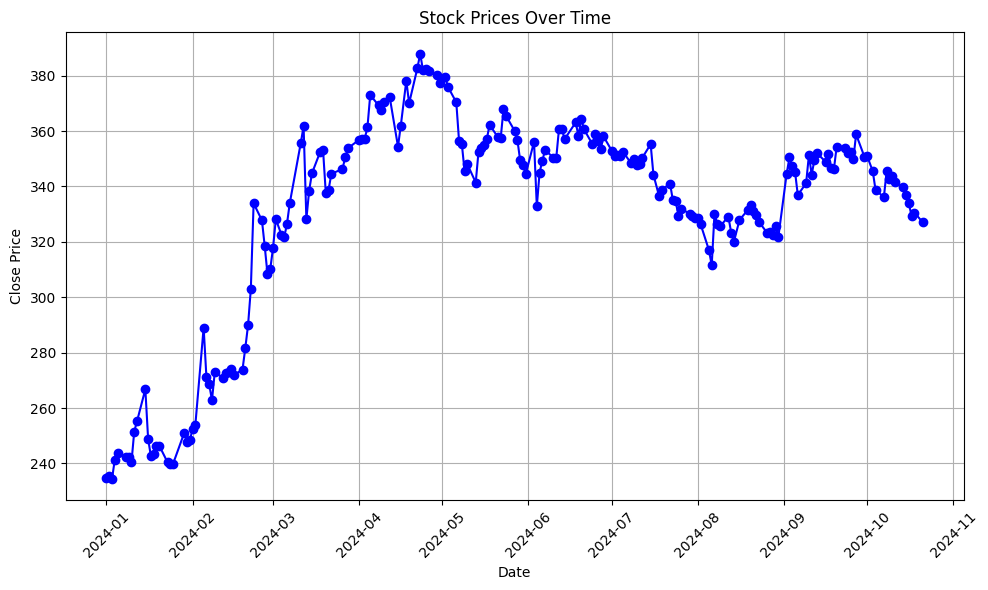

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(jio_data['Date'], jio_data['Close Price'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
jio_data.set_index('Date', inplace=True)


In [ ]:
jio_data = jio_data.sort_index()

jio_data.head()

,Close Price
Date,
2024-01-01,234.60
2024-01-02,235.30
2024-01-03,234.45
2024-01-04,241.35
2024-01-05,243.65


In [ ]:
decomposition = seasonal_decompose(jio_data['Close Price'], model='multiplicative', period=5)


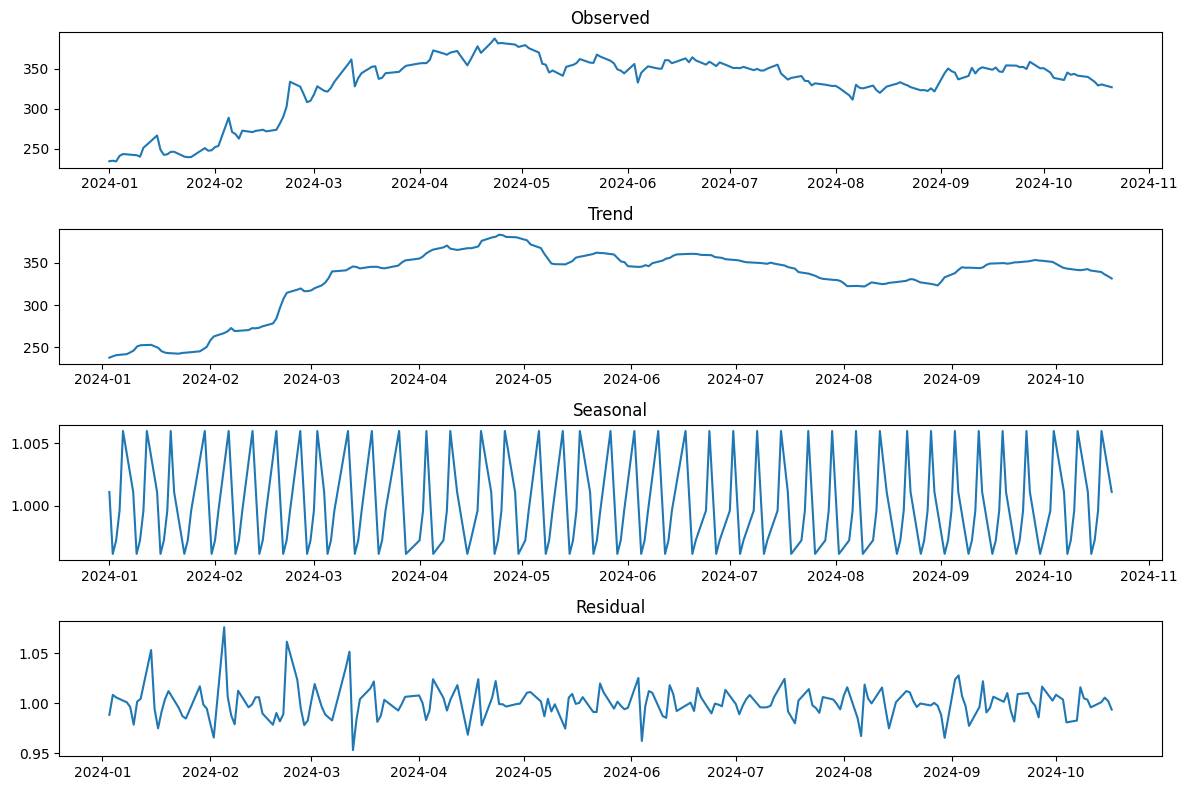

In [ ]:
# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

1. Observed (Top Plot):
This is the original time series data, which in this case looks like the daily stock prices. The plot shows how the stock price changes over time from January 2024 to October 2024.

In the first few months, we can see a general rise in stock price, peaking around May 2024.
After the peak, the stock price shows a decline that continues towards October 2024.
This plot contains all the information, including the trend, seasonality, and random noise.
2. Trend (Second Plot):
This plot isolates the long-term trend in the data.

From the trend plot, we can see that there was a steady upward movement in the stock price from January 2024 to May 2024.
After May, the trend shows a gradual decline, which is likely indicating that the overall market direction is downward during the later months.
The trend gives you a smoother, clearer view of where the stock price is generally headed, ignoring any short-term fluctuations.
3. Seasonal (Third Plot):
This plot represents the seasonal or cyclical patterns that repeat over a consistent period (here it seems to be weekly or monthly cycles).

The seasonal plot has regular, repeating peaks and valleys. This indicates that there are repetitive cycles in the data, possibly driven by market behavior such as weekly trading patterns or external factors.
In this case, there may be consistent stock price increases and decreases at particular times (like the start or end of each week/month).
4. Residual (Bottom Plot):
This plot shows the residual or noise—what’s left over after removing the trend and seasonal components.

The residual plot is more random and doesn’t follow a specific pattern. These random spikes and dips could be caused by unforeseen events like earnings reports, company news, or sudden changes in the market.
High residual values mean that the data point was an unexpected deviation from the trend and seasonal components. Lower residuals indicate the model is capturing most of the structure of the data.




In [ ]:
jio_data.head()

,Close Price
Date,
2024-01-01,234.60
2024-01-02,235.30
2024-01-03,234.45
2024-01-04,241.35
2024-01-05,243.65


In [ ]:
jio_data.tail()

,Close Price
Date,
2024-10-15,336.85
2024-10-16,333.85
2024-10-17,329.25
2024-10-18,330.55
2024-10-21,327.05


In [ ]:
jio_data = pd.read_csv("/content/sample_data/jio.csv")


jio_data  = jio_data[['Date','Close Price']]


In [ ]:
train = jio_data[:-4]
test = jio_data[-4:]


In [ ]:
train.shape, test.shape

((197, 2), (4, 2))

In [ ]:
historical_mean = np.mean(train['Close Price'])
print(historical_mean)


331.7076142131979


In [ ]:
test.loc[:, 'pred_mean'] = historical_mean


Calculating MAPE (Mean Absolute Percentage Error)
MAPE is a popular metric for evaluating the accuracy of forecast models. It calculates the percentage error between actual and predicted values.
MAPE formula:
M
A
P
E
=
1
n
∑
i
=
1
n
∣
A
i
−
F
i
A
i
∣
×
100
MAPE=
n
1
​
  
i=1
∑
n
​
  
​
  
A
i
​

A
i
​
 −F
i
​

​
  
​
 ×100
Where:

A
i
A
i
​
  is the actual value.
F
i
F
i
​
  is the forecasted value.
n
n is the number of forecasts.
Python implementation of MAPE:

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_hist_mean = mape(test['Close Price'], test['pred_mean'])
print(mape_hist_mean)


40.32169472827592


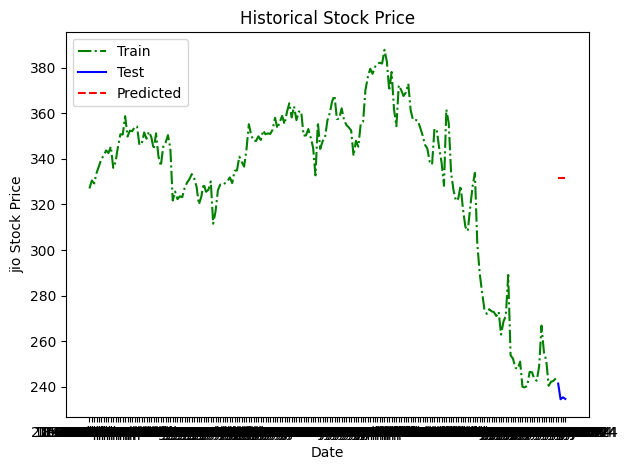

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train['Date'], train['Close Price'], 'g-.', label='Train')
ax.plot(test['Date'], test['Close Price'], 'b-', label='Test')
ax.plot(test['Date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('jio Stock Price')
ax.set_title('Historical Stock Price')
ax.legend(loc=2)
plt.tight_layout()
plt.show()
